# Imports #

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
!pip install mtcnn
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from sklearn.manifold import TSNE
from PIL import Image
from skimage import exposure
from mtcnn import MTCNN
from collections import defaultdict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.2 MB/s eta 0:00:00


In [2]:
current_path = '/content/drive/MyDrive/Colab Notebooks/FacialClustering'

# PreProcess #

## Normalization, Resize ##

In [53]:
from PIL import Image
import os
import numpy as np
from skimage import exposure

def load_and_preprocess_images(dataset_path, save_path, target_size=(224, 224)):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    preprocessed_images = []
    labels = []

    for file_name in os.listdir(dataset_path):
        file_path = os.path.join(dataset_path, file_name)
        if os.path.isfile(file_path):
            image = Image.open(file_path)
            if image.mode != 'RGB':
                image = image.convert('RGB')

            # Crop and resize the image
            image = image.resize(target_size)
            print(image)

            # Convert to numpy array
            image_array = np.array(image)

            # Normalize the pixel values to the range [0, 1]
            image_array = image_array / 255.0

            # Save the preprocessed image
            save_file_path = os.path.join(save_path, file_name + '.png')
            Image.fromarray((image_array * 255).astype(np.uint8)).save(save_file_path)

            preprocessed_images.append(save_file_path)
            labels.append(file_name)

    return preprocessed_images, labels

# Define the dataset path and save path
dataset_path = f'{current_path}/dataset/dataset'
save_path = f'{current_path}/dataset/Normalized.Resized.Dataset'

# Perform loading and preprocessing
preprocessed_images, labels = load_and_preprocess_images(dataset_path, save_path)

print("Preprocessing complete.")


<PIL.Image.Image image mode=RGB size=224x224 at 0x7FE3A41B4CA0>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FE3A41B7C10>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FE39C1C9420>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FE38FBD5AE0>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FE457B0D750>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FE39C1C9420>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FE38FBD5AE0>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FE457B0D750>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FE38F7548B0>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FE39C1C9420>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FE38F7548B0>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FE38FBD5AE0>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FE393F5B970>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FE39C1C9420>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FE393F5B970>
<PIL.Image.Image image mode=RGB size=224

## Normalization, Resize, Face Detection ##

In [54]:
from PIL import Image
import os
import numpy as np
from skimage import exposure
from mtcnn import MTCNN

def load_and_preprocess_images(dataset_path, save_path, target_size=(224, 224)):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    preprocessed_images = []
    labels = []

    detector = MTCNN()

    for file_name in os.listdir(dataset_path):
        file_path = os.path.join(dataset_path, file_name)
        if os.path.isfile(file_path):
            image = Image.open(file_path)
            if image.mode != 'RGB':
                image = image.convert('RGB')

            faces = detector.detect_faces(np.array(image))
            print(faces)

            if len(faces) != 1:
                continue

            x, y, w, h = faces[0]['box']
            # Crop and resize the face region
            image = image.crop((x, y, x + w, y + h)).resize(target_size)

            # Convert to numpy array
            image_array = np.array(image)

            # Normalize the pixel values to the range [0, 1]
            image_array = image_array / 255.0

            # Save the preprocessed image
            save_file_path = os.path.join(save_path, file_name + '.png')
            Image.fromarray((image_array * 255).astype(np.uint8)).save(save_file_path)

            preprocessed_images.append(save_file_path)
            labels.append(file_name)

    return preprocessed_images, labels

# Define the dataset path and save path
dataset_path = f'{current_path}/dataset/dataset'
save_path = f'{current_path}/dataset/Normalized.Resized.FaceDetected.Dataset'

# Perform loading and preprocessing
preprocessed_images, labels = load_and_preprocess_images(dataset_path, save_path)

print("Preprocessing complete.")


1/1 [==============================] - 0s 176ms/step
[{'box': [119, 83, 111, 138], 'confidence': 0.9999492168426514, 'keypoints': {'left_eye': (151, 134), 'right_eye': (203, 134), 'nose': (178, 166), 'mouth_left': (157, 191), 'mouth_right': (200, 191)}}]
1/1 [==============================] - 0s 33ms/step
[{'box': [103, 80, 112, 143], 'confidence': 0.9999380111694336, 'keypoints': {'left_eye': (137, 136), 'right_eye': (188, 135), 'nose': (163, 172), 'mouth_left': (138, 187), 'mouth_right': (188, 187)}}]
1/1 [==============================] - 0s 37ms/step
[{'box': [122, 64, 119, 154], 'confidence': 0.9999986886978149, 'keypoints': {'left_eye': (153, 118), 'right_eye': (207, 122), 'nose': (177, 151), 'mouth_left': (155, 175), 'mouth_right': (205, 178)}}]
1/1 [==============================] - 0s 33ms/step
[{'box': [119, 61, 125, 164], 'confidence': 0.9999946355819702, 'keypoints': {'left_eye': (155, 117), 'right_eye': (210, 118), 'nose': (185, 144), 'mouth_left': (161, 182), 'mouth_right

## Normalization, Face Detection, Crop & Resize, Data Balancing ##

In [48]:
from PIL import Image
import os
import numpy as np
from skimage import exposure
from mtcnn import MTCNN
from collections import defaultdict

def load_and_preprocess_images(dataset_path, save_path, target_size=(224, 224)):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    preprocessed_images = []
    labels = []

    detector = MTCNN()
    label_count = defaultdict(int)

    for file_name in os.listdir(dataset_path):
        file_path = os.path.join(dataset_path, file_name)
        if os.path.isfile(file_path):
            image = Image.open(file_path)
            if image.mode != 'RGB':
                image = image.convert('RGB')

            faces = detector.detect_faces(np.array(image))
            print(faces)
            if len(faces) != 1:
                continue

            x, y, w, h = faces[0]['box']
            # Crop and resize the face region
            image = image.crop((x, y, x + w, y + h)).resize(target_size)

            # Convert to numpy array
            image_array = np.array(image)

            # Normalize the pixel values to the range [0, 1]
            image_array = image_array / 255.0

            # Save the preprocessed image
            save_file_path = os.path.join(save_path, file_name + '.png')
            Image.fromarray((image_array * 255).astype(np.uint8)).save(save_file_path)

            preprocessed_images.append(save_file_path)
            labels.append(file_name)
            label_count[file_name] += 1

    # Ensure data balancing
    min_count = min(label_count.values())
    balanced_preprocessed_images = []
    balanced_labels = []
    for img_path, label in zip(preprocessed_images, labels):
        if label_count[label] > min_count:
            balanced_preprocessed_images.append(img_path)
            balanced_labels.append(label)
            label_count[label] -= 1

    return balanced_preprocessed_images, balanced_labels

# Define the dataset path and save path
dataset_path = f'{current_path}/dataset/dataset'
save_path = f'{current_path}/dataset/Normalized.Resized.FaceDetected.DataBalanced.Dataset'

# Perform loading and preprocessing
preprocessed_images, labels = load_and_preprocess_images(dataset_path, save_path)

print("Preprocessing complete.")


1/1 [==============================] - 0s 37ms/step
Preprocessing complete.


# Load Dataset #

## Default dataset ##

In [58]:
data_path = f'{current_path}/dataset/dataset'

## Normalized, Resized dataset ##

In [ ]:
data_path = f'{current_path}/dataset/Normalized.Resized.Dataset'

## Normalized, Resized, FaceDetected dataset ##

In [ ]:
data_path = f'{current_path}/dataset/Normalized.Resized.FaceDetected.Dataset'

## Normalized, Resized, FaceDetected, DataBalanced ##

In [57]:
data_path = f'{current_path}/dataset/Normalized.Resized.FaceDetected.DataBalanced.Dataset'

Normalized.Resized.FaceDetected.DataBalanced.Dataset


# Feature Extraction Methods #

## NP Feature Extraction ##

In [24]:
# Load the Dataset
# data_path = f'{current_path}/dataset/NormalizedDataset'
image_files = []
labels = []

for file_name in os.listdir(data_path):
    if os.path.isfile(os.path.join(data_path, file_name)):
        image_files.append(os.path.join(data_path, file_name))
        labels.append(file_name)

# Feature Extraction
def extract_feature(image):
    # Apply any preprocessing if needed
    # Extract features using a pre-trained CNN or any other method
    # Placeholder function, replace with actual feature extraction
    feature_vector = np.random.rand(1000)  # Random feature vector, replace with actual features
    return feature_vector

feature_vectors = []
for image_file in image_files:
    image = cv2.imread(image_file)
    feature_vector = extract_feature(image)
    feature_vectors.append(feature_vector)

print('number of labels', len(labels))

# Saving Feature Vectors (optional)
last_component = os.path.basename(data_path)
np.save(f'{current_path}/{last_component}feature_vectors.npy', feature_vectors)
np.save(f'{current_path}/{last_component}labels.npy', labels)

number of labels 175


## VGG16 Feature Extraction ##

In [59]:
# Load the Dataset
# data_path = f'{current_path}/dataset/NormalizedDataset'
# data_path = f'{current_path}/dataset/dataset'
image_files = []
labels = []

for file_name in os.listdir(data_path):
    if os.path.isfile(os.path.join(data_path, file_name)):
        image_files.append(os.path.join(data_path, file_name))
        labels.append(file_name)

# Feature Extraction using a pre-trained CNN (VGG16)
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def extract_feature(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize pixel values
    features = vgg16.predict(img_array)
    return features.flatten()

feature_vectors = []
for image_file in image_files:
    feature_vector = extract_feature(image_file)
    feature_vectors.append(feature_vector)

# Saving Feature Vectors
last_component = os.path.basename(data_path)
np.save(f'{current_path}/{last_component}feature_vectors.npy', feature_vectors)
np.save(f'{current_path}/{last_component}labels.npy', labels)

1/1 [==============================] - 1s 555ms/step


# Dimension Reduction Methods #

## PCA Dimension Reduction ##

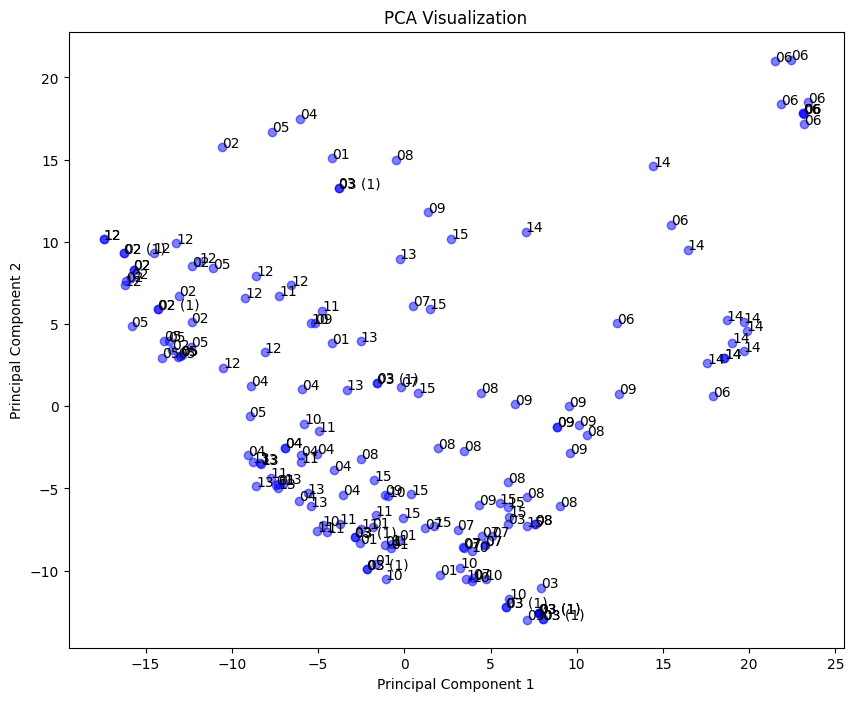

In [50]:
# Dimension Reduction
pca = PCA(n_components=175)  # You can choose the number of components based on your dataset
reduced_features = pca.fit_transform(feature_vectors)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c='blue', alpha=0.5)
for i in range(len(labels)):
    plt.text(reduced_features[i, 0], reduced_features[i, 1], labels[i].split('.')[0].split('subject')[1])
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## TSNE Dimension Reduction ##

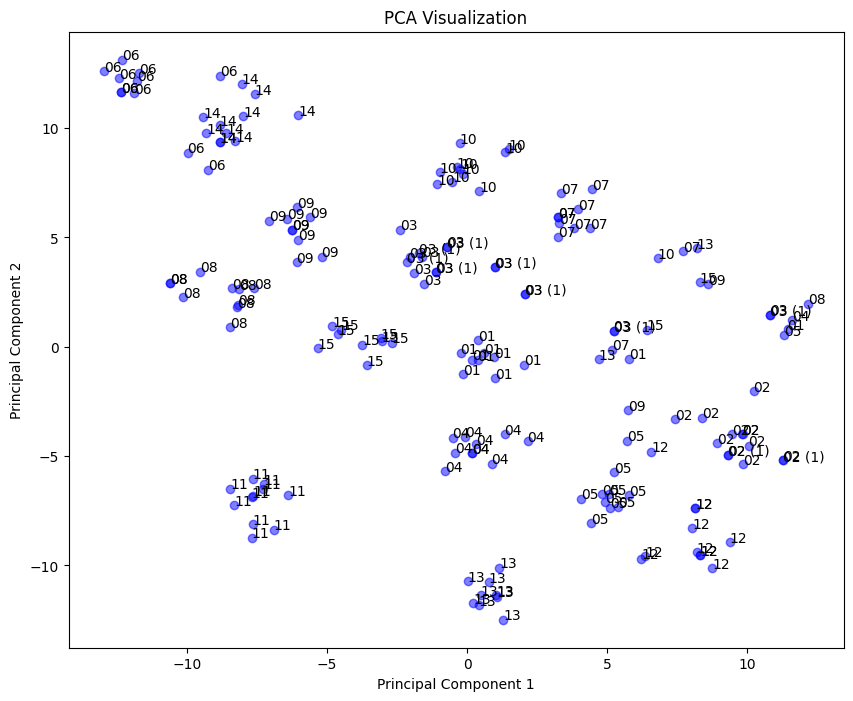

In [60]:
# Dimension Reduction using t-SNE
# Convert feature_vectors to a NumPy array
feature_vectors_array = np.array(feature_vectors)

# Dimension Reduction using t-SNE
tsne = TSNE(n_components=2)
reduced_features = tsne.fit_transform(feature_vectors_array)
# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c='blue', alpha=0.5)
for i in range(len(labels)):
    plt.text(reduced_features[i, 0], reduced_features[i, 1], labels[i].split('.')[0].split('subject')[1])
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Clustering Methods #

## Kmeans Clustering  ##

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


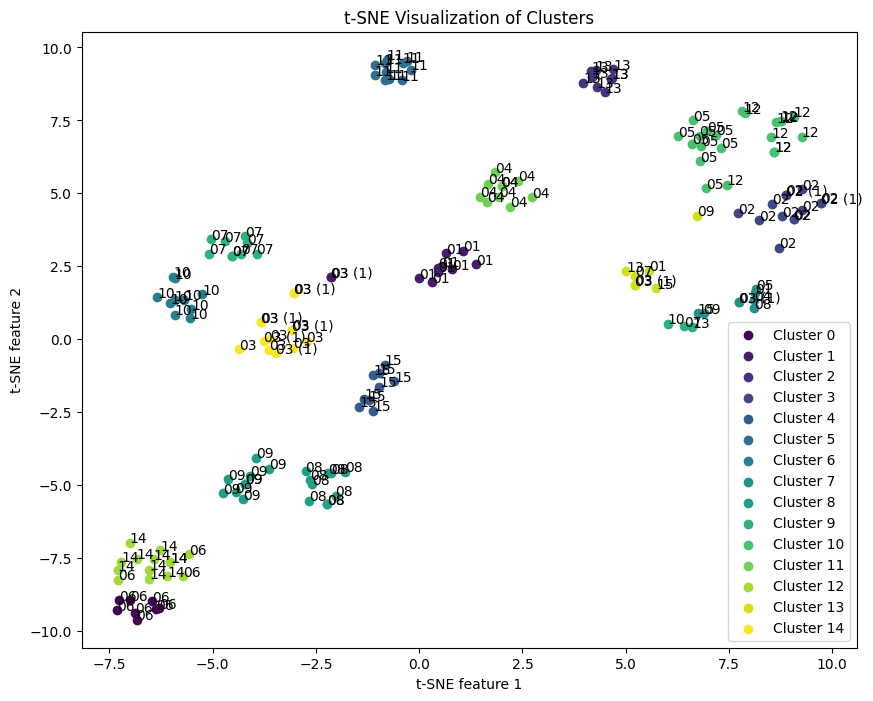

In [61]:
# Clustering
kmeans = KMeans(n_clusters=15)  # You can choose the number of clusters based on your dataset
clusters = kmeans.fit_predict(reduced_features)

# Visualization
tsne = TSNE(n_components=2)
embedded_features = tsne.fit_transform(reduced_features)

# Get unique cluster labels
unique_clusters = np.unique(clusters)

# Define colors for each cluster
cluster_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Plotting
plt.figure(figsize=(10, 8))
for i, cluster_label in enumerate(unique_clusters):
    cluster_indices = np.where(clusters == cluster_label)[0]
    plt.scatter(embedded_features[cluster_indices, 0], embedded_features[cluster_indices, 1], c=[cluster_colors[i]], label=f'Cluster {cluster_label}')

# Add labels
for i in range(len(embedded_features)):
    plt.text(embedded_features[i, 0], embedded_features[i, 1], labels[i].split('.')[0].split('subject')[1])

plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend()
plt.show()

## DBSCAN Clustering  ##

19


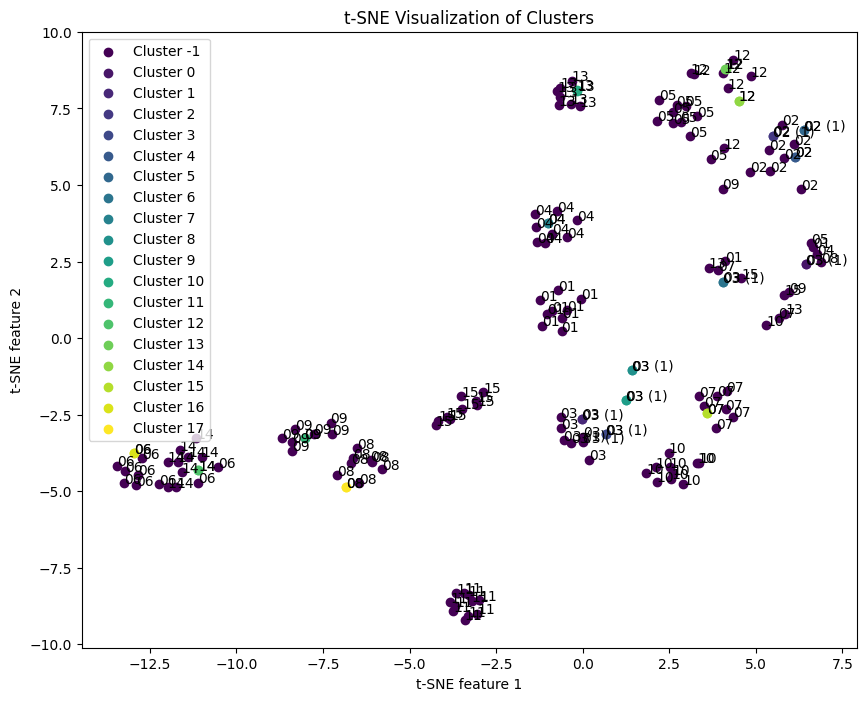

In [62]:
# Clustering
dbscan = DBSCAN(eps=0.1, min_samples=2)  # Adjust parameters as needed
clusters = dbscan.fit_predict(reduced_features)

# Visualization
tsne = TSNE(n_components=2)
embedded_features = tsne.fit_transform(reduced_features)

# Get unique cluster labels
unique_clusters = np.unique(clusters)
print(len(unique_clusters))

# Define colors for each cluster
cluster_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Plotting
plt.figure(figsize=(10, 8))
for i, cluster_label in enumerate(unique_clusters):
    cluster_indices = np.where(clusters == cluster_label)[0]
    plt.scatter(embedded_features[cluster_indices, 0], embedded_features[cluster_indices, 1], c=[cluster_colors[i]], label=f'Cluster {cluster_label}')

# Add labels
for i in range(len(embedded_features)):
    plt.text(embedded_features[i, 0], embedded_features[i, 1], labels[i].split('.')[0].split('subject')[1])

plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend()
plt.show()
